In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

Import data and explore

In [2]:
cases = pd.read_csv('data/COVID_CountByZipPerDate 03292021.csv')
cases.head(5)

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [3]:
vaccines = pd.read_csv('data/vaccine_with_protocol.csv')
vaccines.head(5)

,vacc_date,zipcode,count_given,dose_nbr,protocol
0,2020-12-12,37215.0,1.0,1.0,two-shot
1,2020-12-14,37205.0,1.0,2.0,two-shot
2,2020-12-14,37215.0,1.0,1.0,two-shot
3,2020-12-15,37221.0,1.0,1.0,two-shot
4,2020-12-16,37215.0,1.0,1.0,two-shot


In [4]:
pop = pd.read_csv('data/pop_by_zip.csv')

In [5]:
pop.head(5)

,Zip,Location,Population,Den
0,37212,"36.133973, -86.801471",18547,6556.46
1,37201,"36.165550, -86.777679",1167,3602.97
2,37206,"36.180771, -86.730153",27751,3597.99
3,37208,"36.178567, -86.805263",15272,3416.62
4,37219,"36.166457, -86.782946",830,3259.85


In [6]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8832 entries, 0 to 8831
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Specimen Collection Date  8832 non-null   object 
 1   Zip                       8456 non-null   float64
 2   Cases                     8832 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 207.1+ KB


In [7]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vacc_date    6694 non-null   object 
 1   zipcode      6462 non-null   float64
 2   count_given  6686 non-null   float64
 3   dose_nbr     6686 non-null   float64
 4   protocol     6694 non-null   object 
dtypes: float64(3), object(2)
memory usage: 261.6+ KB


In [8]:
vaccines['count_given'].sum()

334890.0

In [9]:
cases['Cases'].sum()

93619

In [10]:
vac_by_zip = vaccines.groupby('zipcode')['count_given'].sum()
df_vac_by_zip = vac_by_zip.to_frame()
df_vac_by_zip

,count_given
zipcode,
37013.0,27167.0
37027.0,506.0
37069.0,89.0
37072.0,13108.0
37076.0,16855.0
37080.0,3078.0
37115.0,12827.0
37138.0,10873.0
37189.0,1650.0


In [11]:
cases_by_zip = cases.groupby('Zip')['Cases'].sum()
df_cases_by_zip = cases_by_zip.to_frame()
df_cases_by_zip

,Cases
Zip,
37013.0,13354
37027.0,231
37069.0,16
37072.0,2984
37076.0,4279
37080.0,574
37115.0,4574
37138.0,2359
37189.0,479


<AxesSubplot:xlabel='zipcode'>

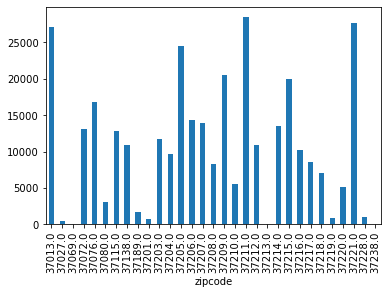

In [12]:
vac_by_zip.plot.bar()

<AxesSubplot:xlabel='Zip'>

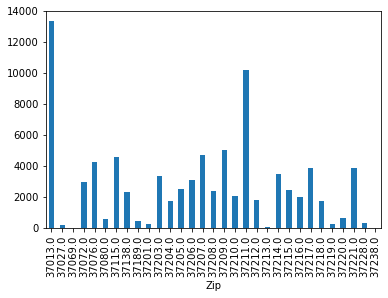

In [13]:
cases_by_zip.plot.bar()

In [14]:
top5cases = cases_by_zip.nlargest(5)
top5vaccines = vac_by_zip.nlargest(5)
bottom5cases = cases_by_zip.nsmallest(5)
bottom5vaccines = vac_by_zip.nsmallest(5)

In [15]:
bottom5vaccines

zipcode
37238.0      5.0
37069.0     89.0
37213.0    102.0
37027.0    506.0
37201.0    756.0
Name: count_given, dtype: float64

In [16]:
df_cases_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 37013.0 to 37238.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Cases   31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [17]:
df_vac_by_zip.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31 entries, 37013.0 to 37238.0
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   count_given  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [18]:
df_cases_by_zip = df_cases_by_zip.merge(pop, on=['Zip'], how='left')

In [19]:
df_cases_by_zip

,Zip,Cases,Location,Population,Den
0,37013.0,13354,NaN,51343.0,NaN
1,37027.0,231,NaN,35747.0,NaN
2,37069.0,16,NaN,16243.0,NaN
3,37072.0,2984,NaN,26386.0,NaN
4,37076.0,4279,NaN,29547.0,NaN
5,37080.0,574,NaN,7394.0,NaN
6,37115.0,4574,NaN,35192.0,NaN
7,37138.0,2359,NaN,22160.0,NaN
8,37189.0,479,NaN,2343.0,NaN
9,37201.0,299,"36.165550, -86.777679",1167.0,3602.97


In [20]:
df_cases_by_zip['cases_over_pop'] = df_cases_by_zip['Cases'] / df_cases_by_zip['Population']

In [21]:
df_cases_by_zip['cases_over_pop'] = df_cases_by_zip.apply(lambda row: float(row['Cases']) / float(row['Population']), axis=1)

In [22]:
df_cases_by_zip

,Zip,Cases,Location,Population,Den,cases_over_pop
0,37013.0,13354,NaN,51343.0,NaN,0.260094
1,37027.0,231,NaN,35747.0,NaN,0.006462
2,37069.0,16,NaN,16243.0,NaN,0.000985
3,37072.0,2984,NaN,26386.0,NaN,0.113090
4,37076.0,4279,NaN,29547.0,NaN,0.144820
5,37080.0,574,NaN,7394.0,NaN,0.077631
6,37115.0,4574,NaN,35192.0,NaN,0.129973
7,37138.0,2359,NaN,22160.0,NaN,0.106453
8,37189.0,479,NaN,2343.0,NaN,0.204439
9,37201.0,299,"36.165550, -86.777679",1167.0,3602.97,0.256213


In [23]:
df_vac_by_zip = df_vac_by_zip.merge(pop, left_on='zipcode', right_on='Zip', how='left')

In [24]:
df_vac_by_zip

,count_given,Zip,Location,Population,Den
0,27167.0,37013.0,NaN,51343.0,NaN
1,506.0,37027.0,NaN,35747.0,NaN
2,89.0,37069.0,NaN,16243.0,NaN
3,13108.0,37072.0,NaN,26386.0,NaN
4,16855.0,37076.0,NaN,29547.0,NaN
5,3078.0,37080.0,NaN,7394.0,NaN
6,12827.0,37115.0,NaN,35192.0,NaN
7,10873.0,37138.0,NaN,22160.0,NaN
8,1650.0,37189.0,NaN,2343.0,NaN
9,756.0,37201.0,"36.165550, -86.777679",1167.0,3602.97


In [25]:
df_vac_by_zip['vac_over_pop'] = df_vac_by_zip.apply(lambda row: float(row['count_given']) / float(row['Population']), axis=1)

In [26]:
df_vac_by_zip

,count_given,Zip,Location,Population,Den,vac_over_pop
0,27167.0,37013.0,NaN,51343.0,NaN,0.529128
1,506.0,37027.0,NaN,35747.0,NaN,0.014155
2,89.0,37069.0,NaN,16243.0,NaN,0.005479
3,13108.0,37072.0,NaN,26386.0,NaN,0.496779
4,16855.0,37076.0,NaN,29547.0,NaN,0.570447
5,3078.0,37080.0,NaN,7394.0,NaN,0.416283
6,12827.0,37115.0,NaN,35192.0,NaN,0.364486
7,10873.0,37138.0,NaN,22160.0,NaN,0.490659
8,1650.0,37189.0,NaN,2343.0,NaN,0.704225
9,756.0,37201.0,"36.165550, -86.777679",1167.0,3602.97,0.647815


<AxesSubplot:xlabel='Zip'>

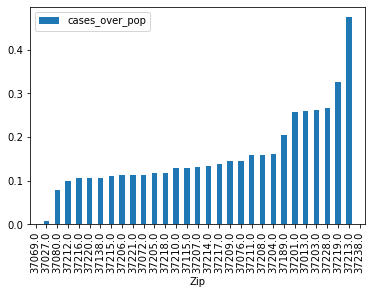

In [29]:
df_cases_by_zip = df_cases_by_zip.sort_values('cases_over_pop')
df_cases_by_zip.plot.bar(x='Zip', y='cases_over_pop')

<AxesSubplot:xlabel='Zip'>

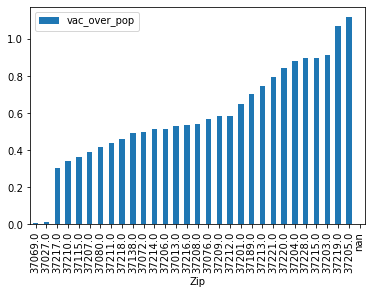

In [30]:
df_vac_by_zip = df_vac_by_zip.sort_values('vac_over_pop')
df_vac_by_zip.plot.bar(x='Zip', y='vac_over_pop')